<a href="https://www.kaggle.com/code/friday3000/mnist-dataset?scriptVersionId=190751025" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digitrecognizer/sample_submission.csv
/kaggle/input/digitrecognizer/train.csv
/kaggle/input/digitrecognizer/test.csv


In [3]:
import tensorflow as tf
np.random.seed(27)
tf.random.set_seed(27)

2024-04-27 14:53:44.994747: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-27 14:53:44.994897: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-27 14:53:45.154437: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
test_data = pd.read_csv('/kaggle/input/digitrecognizer/test.csv')
train_data = pd.read_csv('/kaggle/input/digitrecognizer/train.csv')

In [5]:
X = train_data.drop(columns = ['label'])
y = train_data['label']


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split( X,y, test_size = 0.3, random_state = 42)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
model = Sequential()
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [8]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.8200 - loss: 4.7233 - val_accuracy: 0.9316 - val_loss: 0.2885
Epoch 2/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9347 - loss: 0.2640 - val_accuracy: 0.9456 - val_loss: 0.2253
Epoch 3/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9519 - loss: 0.1781 - val_accuracy: 0.9308 - val_loss: 0.3139
Epoch 4/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9552 - loss: 0.1623 - val_accuracy: 0.9587 - val_loss: 0.1914
Epoch 5/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9603 - loss: 0.1440 - val_accuracy: 0.9443 - val_loss: 0.2361
Epoch 6/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9645 - loss: 0.1279 - val_accuracy: 0.9566 - val_loss: 0.2056
Epoch 7/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9685 - loss: 0.1157 - val_accuracy: 0.9520 - val_loss: 0.2372
Epoch 8/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9678 - loss: 0.1253 - 

<Axes: >

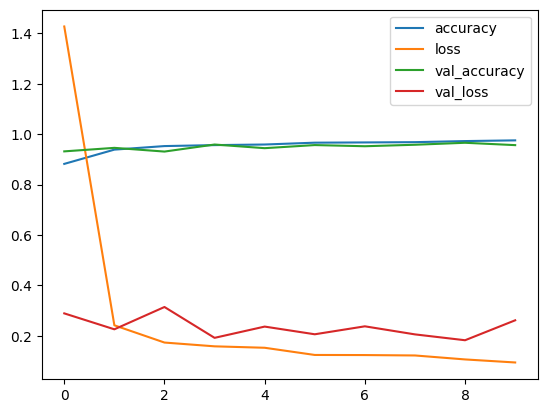

In [9]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [10]:
predictions = model.predict(x_test)
test_loss,test_accuracy = model.evaluate(x_test,y_test)
print(f'Test Loss : {test_loss}')
print(f'Test acuracy : {test_accuracy}')

394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9545 - loss: 0.2722
Test Loss : 0.2610864043235779
Test acuracy : 0.9563491940498352
